## Load required modules.

TODO: Select according to shape. For example, exclude intrusions.

In [1]:
%matplotlib widget
# Import ncessary modules.
from sklearn.decomposition import PCA
import xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## Read EXCEL data file into data frame.

In [2]:
# File path to your Excel file.
file_path = 'Geochemistry Results-AGG reduced variables.xlsx'

# Define the sheet name to read.
sheet_name = 'Litogeochemistry - clean'

# Read only two columns "Th_ppm" and "U_ppm".
df = pd.read_excel(file_path, sheet_name=sheet_name)



In [3]:
df.head()

,Sample Description,Year,Depth(meters),Lithology,Shape,Comment,PTS,Al2O3_pct,BaO_pct,CaO_pct,...,Cd_ppm,Co_ppm,Cu_ppm,Li_ppm,Mo_ppm,Ni_ppm,Pb_ppm,Zn_ppm,C_pct,S_pct
0,S10-01,2022,4.44,Di-Tr dolomitic marble,Marble Units,NaN,No,0.73,0.02,26.7,...,0.25,4.0,10,20,1.0,6.0,4,27,7.22,0.23
1,S10-02,2022,14.49,Dolomitic marble,Marble Units,NaN,No,0.68,0.08,30.3,...,0.25,2.0,9,20,1.0,5.0,6,22,9.99,0.75
2,S10-03,2022,15.74,Dolomitic marble,Marble Units,NaN,No,0.56,0.01,29.4,...,0.25,1.0,5,10,1.0,4.0,3,23,10.55,0.58
3,S10-04,2022,26.80,Calcitic marble,Marble Units,NaN,Yes,0.92,0.04,37.0,...,0.25,0.5,4,20,1.0,3.0,10,31,7.76,0.26
4,S10-05,2022,27.02,Calcitic marble,Marble Units,NaN,Yes,3.18,0.08,35.4,...,0.25,3.0,9,10,1.0,7.0,4,13,7.79,1.22


In [4]:
df.shape

(103, 66)

## Remove symbols "<" and "NaN".

In [5]:
df = df.iloc[: , 7:]
df=df.replace('\<','',regex=True).astype(float)
df = df[np.isfinite(df).all(1)]
df = df.dropna()
df.head()

,Al2O3_pct,BaO_pct,CaO_pct,Fe2O3_pct,K2O_pct,MgO_pct,MnO_pct,Na2O_pct,P2O5_pct,SiO2_pct,...,Cd_ppm,Co_ppm,Cu_ppm,Li_ppm,Mo_ppm,Ni_ppm,Pb_ppm,Zn_ppm,C_pct,S_pct
0,0.73,0.02,26.7,0.72,0.20,18.70,0.06,0.48,0.13,25.27,...,0.25,4.0,10.0,20.0,1.0,6.0,4.0,27.0,7.22,0.23
1,0.68,0.08,30.3,1.44,0.28,18.15,0.11,0.40,0.20,9.90,...,0.25,2.0,9.0,20.0,1.0,5.0,6.0,22.0,9.99,0.75
2,0.56,0.01,29.4,1.23,0.05,19.40,0.10,0.29,0.16,10.46,...,0.25,1.0,5.0,10.0,1.0,4.0,3.0,23.0,10.55,0.58
3,0.92,0.04,37.0,0.59,0.17,10.20,0.05,0.62,0.07,19.68,...,0.25,0.5,4.0,20.0,1.0,3.0,10.0,31.0,7.76,0.26
4,3.18,0.08,35.4,1.78,0.09,5.33,0.05,1.82,0.08,23.63,...,0.25,3.0,9.0,10.0,1.0,7.0,4.0,13.0,7.79,1.22


In [6]:
df.shape

(103, 59)

## Scale data and apply PCA.

In [7]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method 
scaling.fit(df)
Scaled_data=scaling.transform(df)
 
# Set the n_components=3
pca=PCA(n_components=3)
pca.fit(Scaled_data)
x=pca.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(103, 3)


## Create a datafram for PCA componenets and scale it.

In [8]:
# Create dataframe
pca_df = pd.DataFrame(
    data=x, 
    #columns=['PC1', 'PC2', 'PC3'])
    columns=['PC'+str(i) for i in range(1, len(pca.components_)+1)])
pca_df

,PC1,PC2,PC3
0,-2.904121,-0.687502,-1.153024
1,-2.373494,0.971286,-1.018139
2,-3.351016,0.273103,-0.897033
3,-1.068464,0.890351,-1.551955
4,1.256470,0.581373,-0.742524
...,...,...,...
98,8.492903,-3.062950,2.291491
99,8.186120,-3.821682,2.597764
100,-3.457230,-0.788820,-1.570951
101,-4.381459,0.132171,-1.652483


In [9]:
# Create the scaled PCA dataframe
pca_df_scaled = pca_df.copy()
  
scaler_df = pca_df[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

## Display loadings.

In [10]:
#loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=df.columns)
loadings = pd.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(1, len(pca.components_)+1)], index=df.columns)
loadings

,PC1,PC2,PC3
Al2O3_pct,0.180261,-0.185359,0.016116
BaO_pct,0.024680,0.125858,-0.065522
CaO_pct,-0.142331,0.198317,-0.091482
Fe2O3_pct,0.115688,-0.036155,0.260673
K2O_pct,0.098494,-0.043678,-0.059100
MgO_pct,-0.136432,0.071195,-0.020192
MnO_pct,-0.094592,0.170333,0.184271
Na2O_pct,0.169173,-0.186011,0.056581
P2O5_pct,0.097717,0.237639,-0.014531
SiO2_pct,0.138027,-0.225922,-0.036639


## Display sorted loadings.

In [11]:
sorted_loadings = loadings.sort_values(by='PC1', ascending=False)  # Change 'ascending' as needed
sorted_loadings

,PC1,PC2,PC3
TiO2_pct,0.195949,-0.140755,0.025195
Tm_ppm,0.191060,0.052825,0.056302
Er_ppm,0.190792,0.093998,0.034395
Ta_ppm,0.188850,-0.140230,0.015115
Ho_ppm,0.188180,0.136500,0.008733
Nb_ppm,0.187310,-0.123425,-0.010697
Lu_ppm,0.185558,0.010767,0.077332
Yb_ppm,0.185426,0.021013,0.070684
Zr_ppm,0.183912,-0.094314,-0.036313
Y_ppm,0.183367,0.152319,0.004874


In [12]:
sorted_loadings = loadings.sort_values(by='PC2', ascending=False)  # Change 'ascending' as needed
sorted_loadings

,PC1,PC2,PC3
P2O5_pct,0.097717,0.237639,-0.014531
Sm_ppm,0.160174,0.227373,-0.082964
Nd_ppm,0.151188,0.226907,-0.095496
Eu_ppm,0.152673,0.222928,-0.081283
Gd_ppm,0.164454,0.215763,-0.061135
Pr_ppm,0.139769,0.215138,-0.095558
Ce_ppm,0.126893,0.206326,-0.089268
Tb_ppm,0.170621,0.199691,-0.044206
CaO_pct,-0.142331,0.198317,-0.091482
La_ppm,0.085348,0.184389,-0.077520


In [13]:
sorted_loadings = loadings.sort_values(by='PC3', ascending=False)  # Change 'ascending' as needed
sorted_loadings

,PC1,PC2,PC3
Se_ppm,-0.010507,0.090971,0.373598
Cd_ppm,-0.025655,0.095289,0.337421
Zn_ppm,-0.025999,0.094769,0.335291
In_ppm,-0.022009,0.091095,0.322806
S_pct,0.064049,-0.005180,0.318976
Fe2O3_pct,0.115688,-0.036155,0.260673
Hg_ppm,-0.014188,0.077241,0.226618
Ag_ppm,-0.024403,0.042006,0.185775
MnO_pct,-0.094592,0.170333,0.184271
Cu_ppm,0.052287,0.132321,0.164487


## Plot a 3D scatter plot with arrows for PCA directions.

In [14]:
import pandas as pd

# File path to your Excel file.
file_path = 'Geochemistry Results-AGG reduced variables.xlsx'

# Define the sheet name to read.
sheet_name = 'Litogeochemistry - clean'

# Read only the 3rd column.
dc = pd.read_excel(file_path, sheet_name=sheet_name, usecols=[3])

dc = dc.rename(columns={dc.columns[0]: 'Lithology'})

color_map = {
    'Calcitic marble': 'lime',
    'Dolomitic marble': 'blue',
    'Di-Tr dolomitic marble': 'cyan',
    'Carbonatite': 'deeppink',
    'Carbonatite-like': 'pink',
    'Syenite': 'black',
    'Altered Syenite': 'black',
    'Syenite-like': 'black',
    'Impure Siliciclastic': 'grey',
    'Pure Siliciclastic': 'lightgrey'
}

dc['Color'] = dc['Lithology'].map(color_map)
#dc[dc.columns[0]] = dc[dc.columns[0]].map(color_map)

dc=dc.replace('\<','NaN',regex=True)
dc = dc[np.isfinite(df).all(1)]
dc = dc.dropna()

print(dc)
print (pca_df_scaled)
print("Shape of y:", dc.shape)
#print("Shape of X:", X.shape)


                  Lithology      Color
0    Di-Tr dolomitic marble       cyan
1          Dolomitic marble       blue
2          Dolomitic marble       blue
3           Calcitic marble       lime
4           Calcitic marble       lime
..                      ...        ...
98       Pure Siliciclastic  lightgrey
99       Pure Siliciclastic  lightgrey
100  Di-Tr dolomitic marble       cyan
101        Dolomitic marble       blue
102        Dolomitic marble       blue

[103 rows x 2 columns]
          PC1       PC2       PC3
0   -0.118379 -0.029983 -0.067941
1   -0.096749  0.042360 -0.059993
2   -0.136595  0.011911 -0.052857
3   -0.043553  0.038830 -0.091448
4    0.051217  0.025355 -0.043753
..        ...       ...       ...
98   0.346190 -0.133581  0.135025
99   0.333685 -0.166671  0.153072
100 -0.140925 -0.034402 -0.092568
101 -0.178598  0.005764 -0.097372
102 -0.153319  0.015151 -0.107366

[103 rows x 3 columns]
Shape of y: (103, 2)


In [15]:
import pandas as pd

# File path to your Excel file.
file_path = 'Geochemistry Results-AGG reduced variables.xlsx'

# Define the sheet name to read.
sheet_name = 'Litogeochemistry - clean'

# Read only the 3rd column.
ds = pd.read_excel(file_path, sheet_name=sheet_name, usecols=[4])

ds = ds.rename(columns={ds.columns[0]: 'Shape'})

color_map1 = {
    'Marble Units': "^",
    'Altered Intrusion': "*",
    'Siliciclastic': "o",
    'Intrusion': "s",
    'Anamolous Rock': "D",
}

ds["Shapes"] = ds["Shape"].map(color_map1)
#dc[dc.columns[0]] = dc[dc.columns[0]].map(color_map)

ds=ds.replace('\<','NaN',regex=True)
ds = ds[np.isfinite(df).all(1)]
ds = ds.dropna()

print(ds)
#print (pca_df_scaled)
print("Shape of y:", ds.shape)
#print("Shape of X:", X.shape)


             Shape Shapes
0     Marble Units      ^
1     Marble Units      ^
2     Marble Units      ^
3     Marble Units      ^
4     Marble Units      ^
..             ...    ...
98   Siliciclastic      o
99   Siliciclastic      o
100   Marble Units      ^
101   Marble Units      ^
102   Marble Units      ^

[103 rows x 2 columns]
Shape of y: (103, 2)


interactive(children=(Checkbox(value=False, description='Show_Shape'), Output()), _dom_classes=('widget-intera…

interactive(children=(Dropdown(description='Legend', options=(('Shapes Legend', True), ('Lithology Legend', Fa…

interactive(children=(Checkbox(value=False, description='Show all Names'), Output()), _dom_classes=('widget-in…

interactive(children=(Checkbox(value=False, description='Show all Arrows'), Output()), _dom_classes=('widget-i…

Press Command to Select Multiple


SelectMultiple(description='Select multiple items:', options=('all', 'Al2O3_pct', 'BaO_pct', 'CaO_pct', 'Fe2O3…

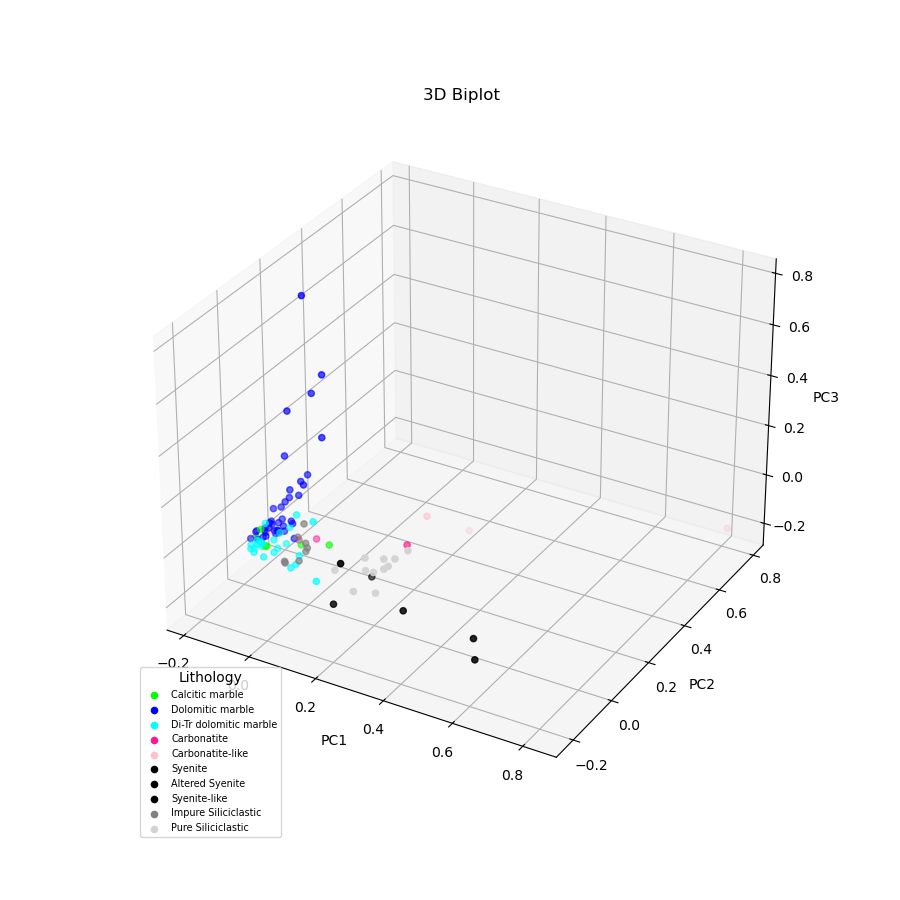

In [16]:
import ipywidgets 
from ipywidgets import interact 
import ipywidgets as widgets
from matplotlib import pyplot


# Initialize the 3D graph
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
  
# Define scaled features as arrays
xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']


# Plot 3D scatterplot of PCA

#df = pd.read_excel(file_path, sheet_name=sheet_name)
#description = df.iloc[:, 0]

descriptions = []
shapes1 = []
for i in range(len(df)):
    shape1 = ax.scatter3D(xdata[i], ydata[i], zdata[i], c=dc['Color'][i], marker=ds["Shapes"][i])
    shapes1.append(shape1)
    #text = ax.text(xdata[i], ydata[i], zdata[i], description[i], size=10, zorder=1, color='k')
    #descriptions.append(text)

#descriptions
dots = ax.scatter3D(xdata, ydata, zdata, c=dc['Color'])
dots.set_visible(True)

def shape(Show_Shape):
    if Show_Shape:
        for shape1 in shapes1:
            shape1.set_visible(True)  
        dots.set_visible(False) 
    else:
        dots.set_visible(True)
        for shape1 in shapes1:
            shape1.set_visible(False)

interact(shape, Show_Shape=False)



#legend
handle1 = []
label1 = []
for lithology, color in color_map.items():
    l1 = ax.scatter([], [], c=color, label=lithology)
    handle1.append(l1)
    label1.append(lithology)

handle2 = []
label2 = []
for shape, shapes in color_map1.items():
    l2 = ax.scatter([], [], c="black", marker=shapes, label=shape)
    handle2.append(l2)
    label2.append(shape)

legend1 = pyplot.legend(handle1, label1, bbox_to_anchor=(0.03, 0.2), title='Lithology', fontsize='x-small')
legend2 = pyplot.legend(handle2, label2, bbox_to_anchor=(0.03, 0.2), title='Shapes', fontsize='x-small')
ax.add_artist(legend1)
ax.add_artist(legend2)


def legenda(Legend):
    if Legend:
        legend1.set_visible(True)  
        legend2.set_visible(False)
    else:
        legend1.set_visible(False)
        legend2.set_visible(True)
interact(legenda, Legend=[('Shapes Legend', True),('Lithology Legend', False)])



# Arrows will be displayed for the following.
show_names=df.columns.tolist()
indx=df.columns.get_indexer(show_names)
scale=2

# Define the x, y, z variables
loadings = pca.components_
xs = scale*loadings[0]
ys = scale*loadings[1]
zs = scale*loadings[2]  
# Plot title of graph
plt.title(f'3D Biplot')
  
# Plot x, y, z labels
ax.set_xlabel('PC1')#, rotation=150)
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')#, rotation=60)
#plt.savefig('3D_biplot.svg')




arrow_list = []
    
# Plot the arrows
x_arr = np.zeros(len(loadings[0]))
y_arr = z_arr = x_arr
# Plot specific arrow
#indx=df.columns.get_loc("Zn_ppm")

#show_arrows = ax.quiver(x_arr[indx], y_arr[indx], z_arr[indx], xs[indx], ys[indx], zs[indx],color='r')
for i, name in enumerate(df.columns):
    ip = df.columns.get_loc(name)
    arrow = ax.quiver(x_arr[ip], y_arr[ip], z_arr[ip], xs[ip], ys[ip], zs[ip], color='r', arrow_length_ratio = 0.1, linewidth=0.5)
    arrow_list.append(arrow)
    
def findarrow(change):
    if change: 
        for a in arrow_list:
            a.set_visible(True)
    else:
        for a in arrow_list:
            a.set_visible(False)
            
# Plot the loadings
namelist = []

for i , names in enumerate(show_names):
    ip=indx[i]
    #ax.scatter(xs[ip], ys[ip], zs[ip], s=100)
    n = ax.text(xs[ip]+0.02, ys[ip]+0.02, zs[ip]+0.02, names, fontsize='small')
    namelist.append(n)

show_name_checkbox = widgets.Checkbox(value=False, description='Show all Names')
all_arrow_checkbox = widgets.Checkbox(value=False, description='Show all Arrows')

def findname(show_name):
    if show_name:
        for n in namelist:
            n.set_visible(True)  
    else:
        for n in namelist:
            n.set_visible(False)

def findname_specific(change):
    selected_items = change['new']
    if 'all' in selected_items:
        select_multiple.value = options
        for n in namelist:
            n.set_visible(True)
        for arrow in arrow_list:
            arrow.set_visible(True)
    else:
        # Otherwise, update visibility based on selected items
        for i in range(len(options[1:])):  # Skip 'all' in options
            if options[i + 1] in selected_items:
                namelist[i].set_visible(True)
                arrow_list[i].set_visible(True)
            else:
                namelist[i].set_visible(False)
                arrow_list[i].set_visible(False)
        show_name_checkbox.value = False
        all_arrow_checkbox.value = False
    plt.draw()

interact(findname, show_name=show_name_checkbox)
interact(findarrow, change=all_arrow_checkbox)

options = ['all','Al2O3_pct','BaO_pct','CaO_pct','Fe2O3_pct','K2O_pct',
           'MgO_pct','MnO_pct','Na2O_pct','P2O5_pct','SiO2_pct',
           'SrO_ppm','TiO2_pct','LOI_pct','Ce_ppm','Cs_ppm','Dy_ppm',
           'Er_ppm','Eu_ppm','Ga_ppm','Gd_ppm','Hf_ppm','Ho_ppm',
           'La_ppm','Lu_ppm','Nb_ppm','Nd_ppm','Pr_ppm','Rb_ppm',
           'Sm_ppm','Sn_ppm','Ta_ppm','Tb_ppm','Th_ppm','Tm_ppm',
           'U_ppm','V_ppm','Y_ppm','Yb_ppm','Zr_ppm','As_ppm',
           'Bi_ppm','Hg_ppm','In_ppm','Re_ppm','Sb_ppm','Sc_ppm',
           'Se_ppm','Tl_ppm','Ag_ppm','Cd_ppm','Co_ppm','Cu_ppm',
           'Li_ppm','Mo_ppm','Ni_ppm','Pb_ppm','Zn_ppm','C_pct','S_pct',]

select_multiple = widgets.SelectMultiple(
    options=options,
    value=[],
    description='Select multiple items:'
)
select_multiple.observe(findname_specific, 'value')
print ('Press Command to Select Multiple')

display(select_multiple)


In [17]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
y = dc['Lithology']
y = y.values.ravel()
X = pca_df_scaled
print("Shape of y:", y.shape)
print("Shape of X:", X.shape)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

print(clf.predict([[0.3, -0.01, 0.1]]))

Shape of y: (103,)
Shape of X: (103, 3)
['Pure Siliciclastic']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


interactive(children=(Checkbox(value=False, description='Show_Shape'), Output()), _dom_classes=('widget-intera…

interactive(children=(Checkbox(value=True, description='Visibility_arrow'), Output()), _dom_classes=('widget-i…

Text(0.5, 1.0, 'PC1/PC2 plane')

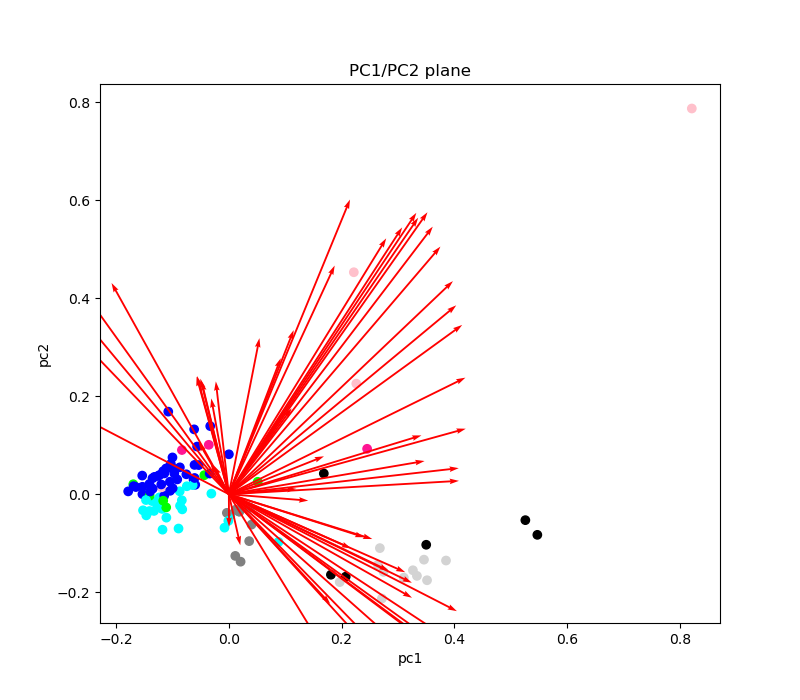

In [18]:
plt.figure(figsize=(8,7))

xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']

shapes2 = []
for i in range(len(df)):
    shape2 = plt.scatter(xdata[i], ydata[i], c=dc['Color'][i], marker=ds["Shapes"][i])
    shapes2.append(shape2)

dots2 = plt.scatter(xdata, ydata, c=dc['Color'])
dots2.set_visible(True)

def shape(Show_Shape):
    if Show_Shape:
        for shape2 in shapes2:
            shape2.set_visible(True)  
        dots2.set_visible(False) 
    else:
        dots2.set_visible(True)
        for shape2 in shapes2:
            shape2.set_visible(False)

interact(shape, Show_Shape=False)


show_names=df.columns.tolist()
indx=df.columns.get_indexer(show_names)


loadings = pca.components_
xs = loadings[0]
ys = loadings[1]


#Plot the arrows
arrow_list_2d = []

x_arr = np.zeros(len(loadings[0]))
y_arr = x_arr

arrow_scale=0.5
for i, name in enumerate(df.columns):
    ip = df.columns.get_loc(name)
    arrow_2d = plt.quiver(x_arr[ip], y_arr[ip], xs[ip], ys[ip], color='r', scale = arrow_scale, width = 0.003)
    arrow_list_2d.append(arrow_2d)
    
def findarrow_2d(Visibility_arrow):
    if Visibility_arrow: 
        for a in arrow_list_2d:
            a.set_visible(True)
    else:
        for a in arrow_list_2d:
            a.set_visible(False)
interact(findarrow_2d, Visibility_arrow=True)

# namelist = []

# for i , names in enumerate(show_names):
#     ip=indx[i]
#     #ax.scatter(xs[ip], ys[ip], zs[ip], s=100)
#     n = plt.text((1/arrow_scale)*xs[ip], (1/arrow_scale)*ys[ip], names, fontsize='small')
#     namelist.append(n)

# def findname(show_name):
#     if show_name:
#         for n in namelist:
#             n.set_visible(True)  
#     else:
#         for n in namelist:
#             n.set_visible(False)

# interact(findname, show_name=True)

plt.xlabel('pc1')
plt.ylabel('pc2')

plt.title("PC1/PC2 plane")

In [19]:
# # import relevant libraries for 3d graph
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(10,10))
 
# # choose projection 3d for creating a 3d graph
# axis = fig.add_subplot(111, projection='3d')
 
# # x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
# img=axis.scatter(x[:,0],x[:,1],x[:,2], c=df['Zn_ppm'])

# # Plot the loadings
# for i in range(5):
#     axis.scatter(xs[i], ys[i], zs[i], s=200)
#     #axis.text(
#     #    xs[i] + 0.1, 
#     #    ys[i] + 0.1, 
#     #    zs[i] + 0.1, 
#     #    varnames)
  
# # Plot the arrows
# x_arr = np.zeros(len(loadings[0]))
# y_arr = z_arr = x_arr
# axis.quiver(x_arr, y_arr, z_arr, xs, ys, zs)

# axis.set_xlabel("PC1")
# axis.set_ylabel("PC2")
# axis.set_zlabel("PC3")
# fig.colorbar(img)

In [20]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Remove all rows that have at least one NaN.
df = df.dropna()

# Remove "<" from the values.
df['Th_ppm'] = df['Th_ppm'].apply(lambda x: x.replace('<', '') if isinstance(x, str) and '<' in x else x)
df['U_ppm'] = df['U_ppm'].apply(lambda x: x.replace('<', '') if isinstance(x, str) and '<' in x else x)

# Change to "object" to "float".
df['Th_ppm'] = df['Th_ppm'].astype(float)
df['U_ppm'] = df['U_ppm'].astype(float)

In [42]:
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from IPython.display import display, clear_output

# Set the data for clustering
X = df[['Th_ppm', 'U_ppm']].values

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#slider = widgets.IntSlider(min=1, max=10, step=1, value=3, description='x')

dd = pd.read_excel(file_path, sheet_name=sheet_name)


def update_kmeans(change=3):
    global df, X, dd
    k = change
    print (k)
    pipe = Pipeline([
    #("scale", StandardScaler()),
    ("model", KMeans(n_clusters=k, n_init='auto'))])

    pipe.fit(X)

    # Add cluster labels to the DataFrame
    df['cluster'] = pipe.named_steps['model'].labels_


    plt.figure(figsize=(11, 9))
    sns.scatterplot(data=df, x="Th_ppm", y="U_ppm", hue='cluster', palette='viridis')


    df.apply(lambda row: plt.text(row['Th_ppm'], row['U_ppm'], dd.iloc[row.name, 0], fontsize=7, ha='center'), axis=1)

    # Show the plot
    #scaler = pipe.named_steps['scale']
    
    centroids = pipe.named_steps['model'].cluster_centers_
    #centroids_original = scaler.inverse_transform(centroids_scaled)

    plt.scatter(centroids[:,0], centroids[:,1], 
            marker="X", c="red", s=80, label="centroids")
    
    plt.legend()
    plt.title("KMeans Clustering")
    plt.show()
    
ipywidgets.interact(update_kmeans, change = (1, 10, 1))

# slider.observe(update_kmeans,'value')

# display(slider)

# update_kmeans({'new': slider.value})




interactive(children=(IntSlider(value=3, description='change', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.update_kmeans(change=3)>

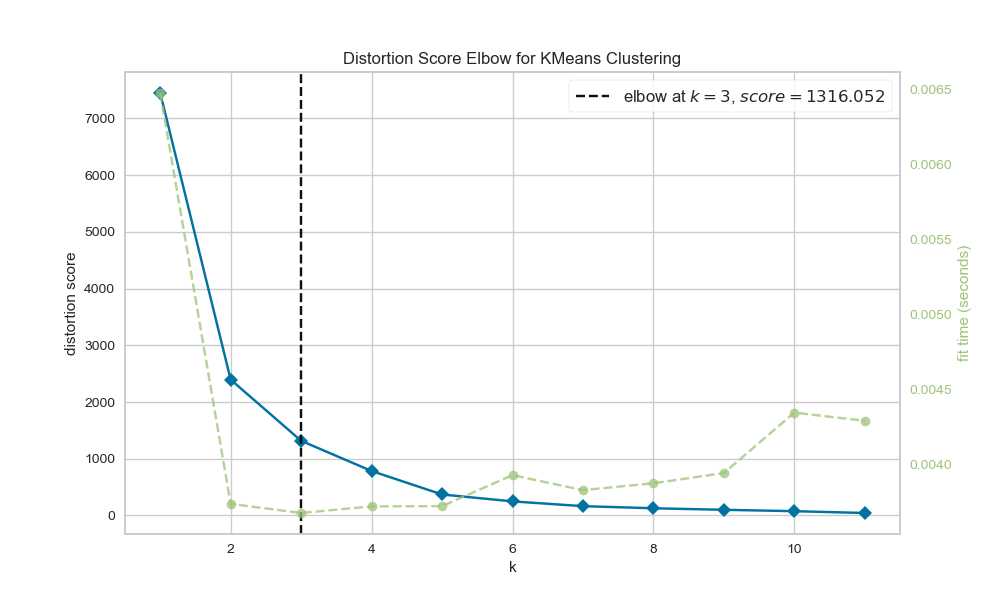

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Plot the distortion score elbow.
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(10, 6))
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1, 12)).fit(X)
visualizer.show()

In [23]:
#import the breast _cancer dataset
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
data.keys()
 
# Check the output classes
print(data['target_names'])
 
# Check the input attributes
print(data['feature_names'])

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [24]:
# construct a dataframe using pandas
df1=pd.DataFrame(data['data'],columns=data['feature_names'])

In [25]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [27]:
a=[{'T1'},{'T2}]

SyntaxError: unterminated string literal (detected at line 1) (3611873704.py, line 1)